# Импорт библиотек и первичный обзор данных

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import skimpy
from skimpy import clean_columns
import phik
from phik.report import plot_correlation_matrix
from phik import resources, report

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Пользовательские функции

In [2]:
# Функция для первичного анализа дата-сета
def analyze_df(df):
    # выводим размерность датафрейма
    display("Размерность датафрейма:")
    display(df.shape)
    display("")

    # выводим информацию о датафрейме
    display("Информация о датафрейме:")
    display(df.info())
    display("")

    # выводим статистическую информацию о датафрейме
    display("Статистическая информация о датафрейме:")
    display(df.describe())
    display("")

    # выодим кол-во пропусков
    display("Кол-во пропусков")
    display(df.isna().sum())
    
    # выодим кол-во дубликатов
    display("Кол-во дубликатов")
    display(df.duplicated().sum())

    # выводим первые 10 строк датафрейма
    display("Первые 10 строк датафрейма:")
    display(df.head(10))

In [3]:
# Функция для преобразования размерности приложений в MB и удаления буквенных обозначений
def format_size(value):
    if pd.isnull(value):
        return value  # Оставояем NaN неизменными
    elif isinstance(value, str):
        if value == 'Varies with device':
            return -1  # Заменяем "зависит от устр."  на минус один
        if "," in value:
            value = value.replace(",", ".")  # Заменяем запятую на точку
        if value.endswith("M"):
            value = value[:-1]  # Удаляем суффикс "M"
            return float(value)
        elif value.endswith("k"):
            value = value[:-1]  # Удаляем суффикс "k"
            return float(value) / 1000
        elif value.endswith("G"):
            value = value[:-1]  # Удаляем суффикс "G"
            return float(value) * 1000
    return value


In [4]:
# Функция для приведения формата данных к корректному виду (Булевому)
def to_bool(col):
    result = []
    for val in col:
        if pd.isnull(val):
            result.append(val)
        elif val == True:
            result.append(1)
        else:
            result.append(0)
    return result


In [5]:
# Функция для удаления всех символов, кроме цифр, и замены запятых на точки
def remove_non_digits(meaning):
    if pd.isnull(meaning):
        return None
    else:
        cleaned_value = re.sub('[^0-9.]', '', meaning)
        try:
            return round(float(cleaned_value), 1)
        except ValueError:
            return None

In [6]:
# Заргрузка датафрейма в формате .csv
data = pd.read_csv('C:\\Users\\feras\\OneDrive\\سطح المكتب\\Mediascope Test-Task\\Google-Playstore.csv')

In [7]:
analyze_df(data)

'Размерность датафрейма:'

(2312944, 24)

''

'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

None

''

'Статистическая информация о датафрейме:'

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


''

'Кол-во пропусков'

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

'Кол-во дубликатов'

0

'Первые 10 строк датафрейма:'

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


Сначала выполним предобработку данных, потом займемся визуализацией

# Предобработка данных

После каждого преобразования была выполнена проверка, однако было решено не включать ее в финальную версию ноутбука во избежания нагромождения ненужной информации

In [8]:
# Исправляем названия столбцов
data = skimpy.clean_columns(data)

In [9]:
# Избавляемся от не нужных данных
data = data.drop(['app_name', 'app_id', 'installs', 'developer_id', 'developer_website', 'developer_email', 'privacy_policy', 'scraped_time'], axis=1, )

In [10]:
# Переводим вес приложений к единой системе и убираем обозначение размерности
data['size'] = data['size'].apply(format_size).astype(float)

In [11]:
# Оставляем только версию ОС
data['minimum_android'] = data['minimum_android'].apply(remove_non_digits)

In [12]:
# Переводим столбцы 'free', 'ad_supported', 'in_app_purchases', 'editors_choice' в Булев тип
to_bool_list = ['free', 'ad_supported', 'in_app_purchases', 'editors_choice']
data[to_bool_list] = data[to_bool_list].apply(to_bool)
data[to_bool_list] = data[to_bool_list].astype(bool)

In [13]:
# Преобразуем столбцы 'released' и 'last_updated' в тип datetime
data[['released', 'last_updated']] = data[['released', 'last_updated']].apply(pd.to_datetime)

In [14]:
# Преобразуем столбцы 'rating_count', 'minimum_installs', 'maximum_installs'в тип Int64
to_int_list = ['rating_count', 'minimum_installs', 'maximum_installs']
data[to_int_list] = data[to_int_list].astype('Int64')

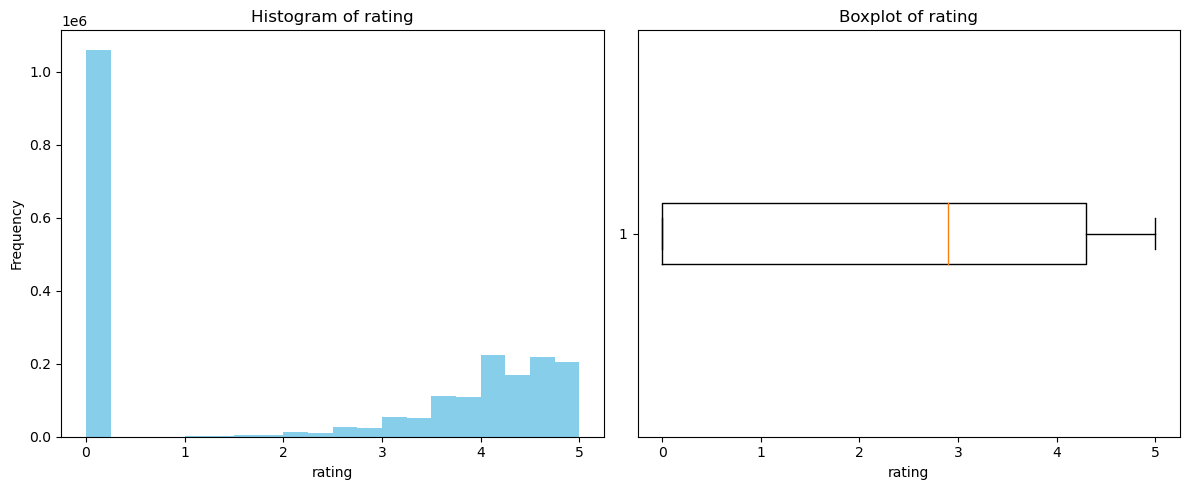

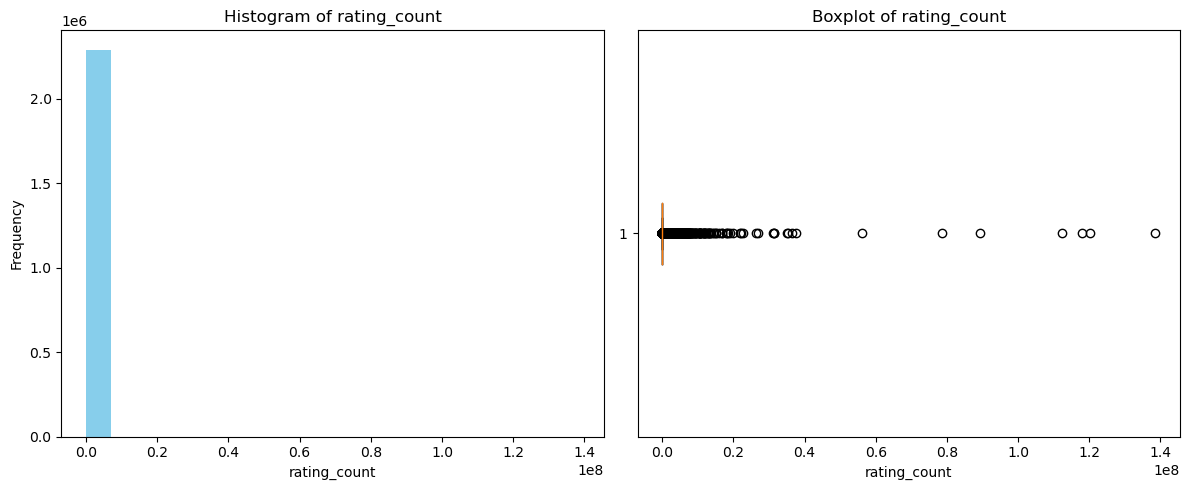

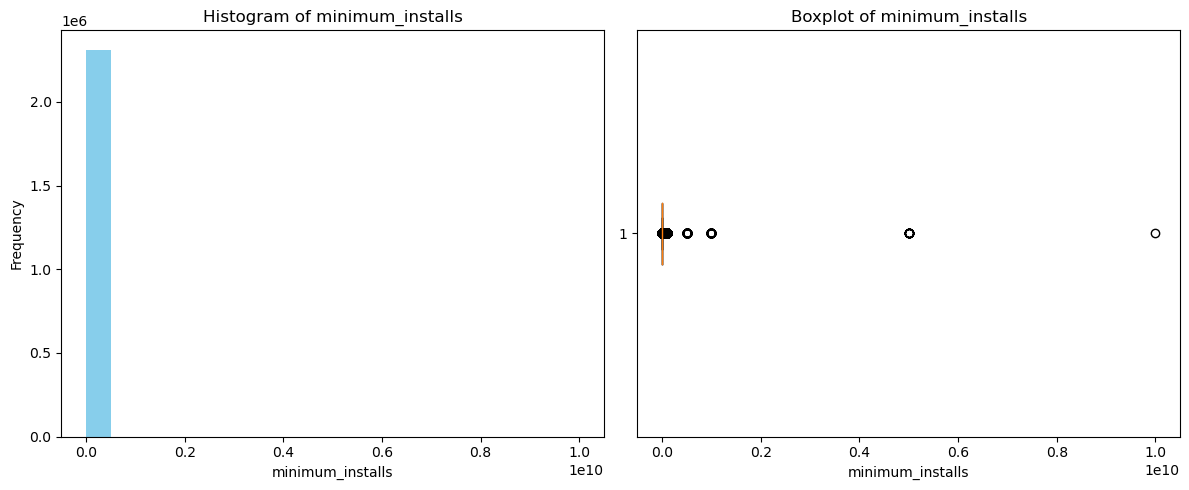

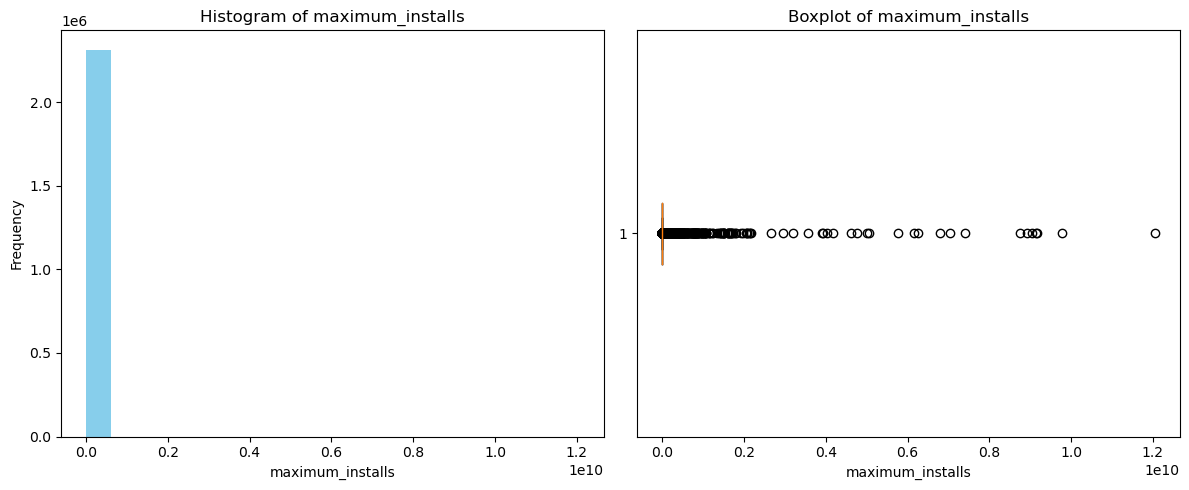

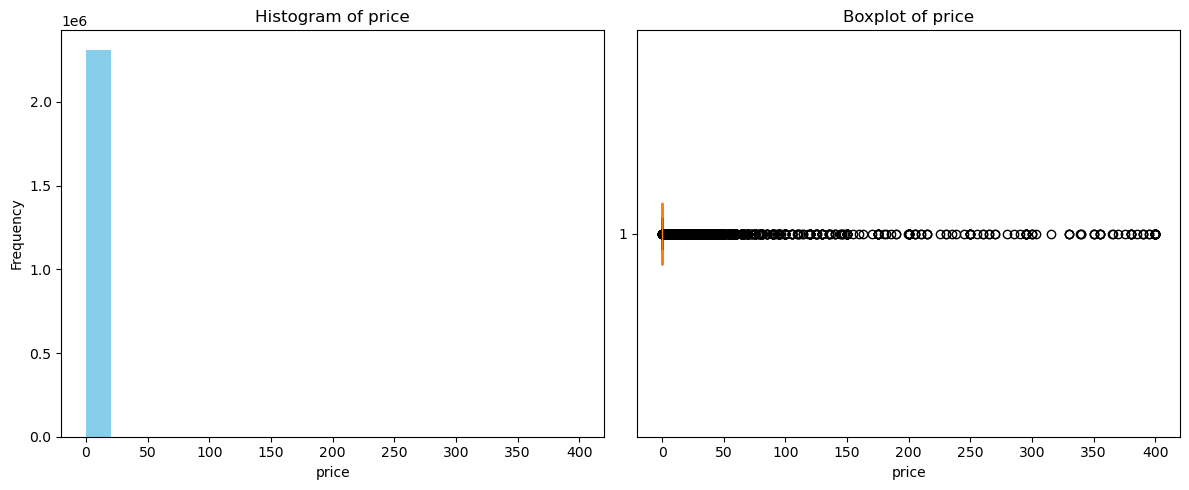

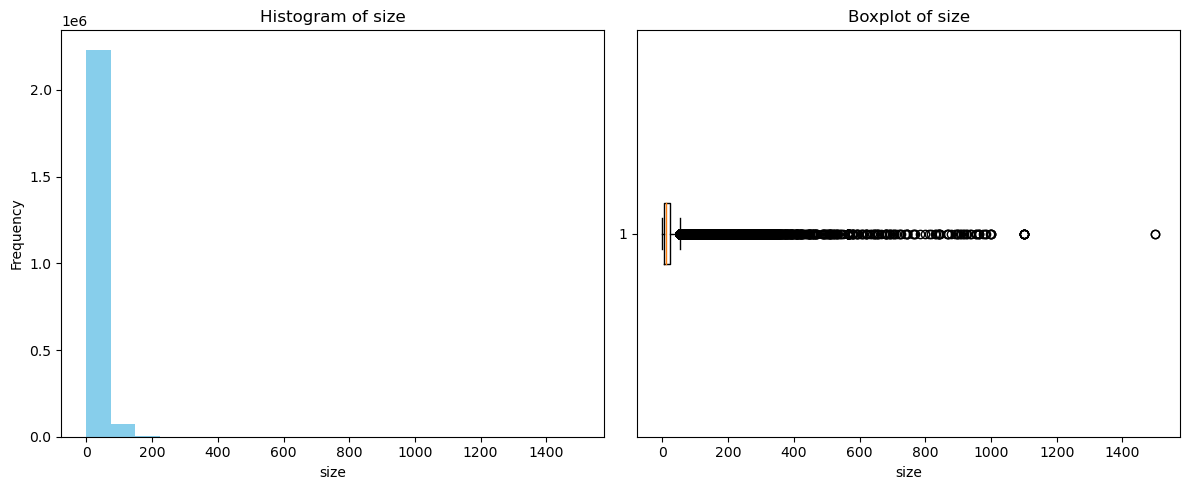

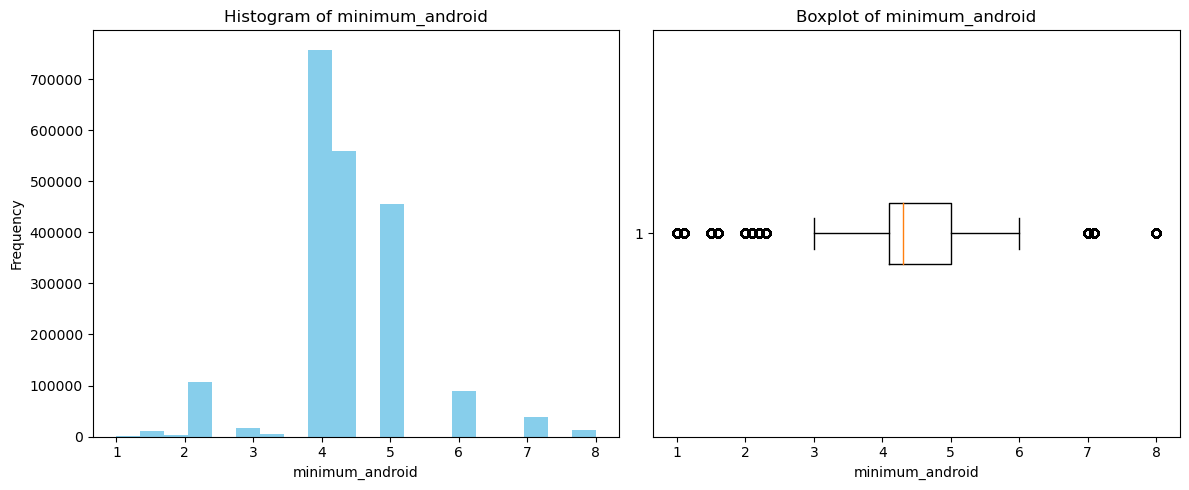

In [15]:
# Получаем список численных столбцов
numeric_columns = data.select_dtypes(include=['Int64', 'float64']).columns

# Определяем функцию для форматирования осей
def format_axes(ax, title, xlabel):
    ax.set_title(title)
    ax.set_xlabel(xlabel)

# Создаем для каждого числового столбца гистограмму и ящик с усами
for column in numeric_columns:
    # Фильтруем пропуски
    data_filtered = data[column].dropna()

    # Создаем фигуру и оси
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Гистограмма
    axs[0].hist(data_filtered, bins=20, color='skyblue')
    format_axes(axs[0], f'Histogram of {column}', column)
    axs[0].set_ylabel('Frequency')

    # Ящик с усами
    axs[1].boxplot(data_filtered, vert=False)
    format_axes(axs[1], f'Boxplot of {column}', column)
    # Выводим графики
    plt.tight_layout()
    plt.show()

In [16]:
# Выводим медиану и среднее столбцов 'rating_count' и 'rating_count'
display(data['rating_count'].sort_values().median(), data['rating_count'].sort_values().mean())

6.0

2864.8388767810115

In [17]:
# Выводим медиану столбцов 'minimum_installs' и maximum_installs'
display(data['minimum_installs'].sort_values().median(), data['maximum_installs'].sort_values().median())

500.0

695.0

In [18]:
display(data['price'].sort_values().median(), data['price'].sort_values().mean())

0.0

0.10349915833370804

In [19]:
display(data['size'].sort_values().median(), data['size'].sort_values().mean())

9.7

18.55362151960006

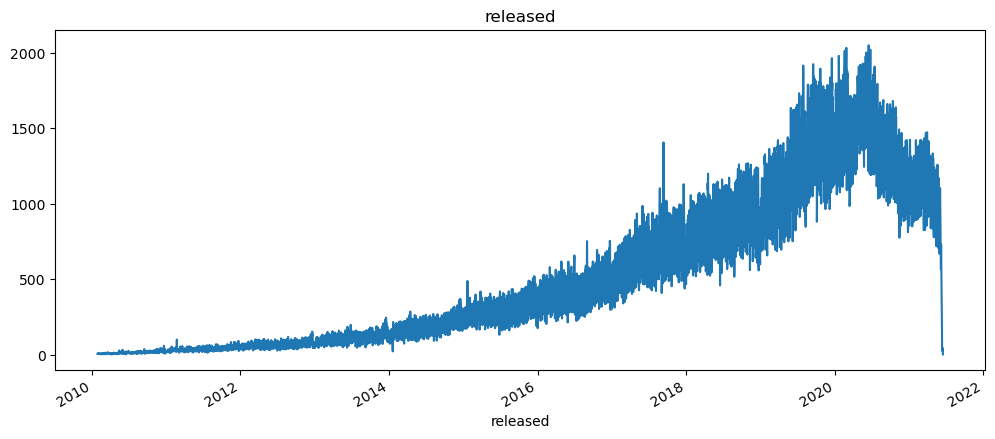

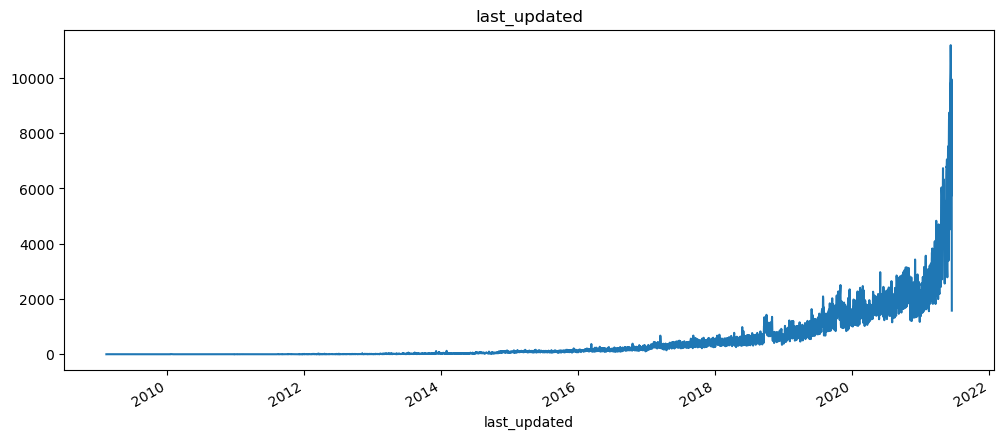

In [20]:
# Получаем список столбцов о дате и времени
datetime_columns = data.select_dtypes(include=['datetime64[ns]']).columns

# Строим линейные графики для соответствующих столбцов
for col in datetime_columns:
    data[col].value_counts().plot(kind='line', figsize=(12, 5))
    plt.title(col)
    plt.show()

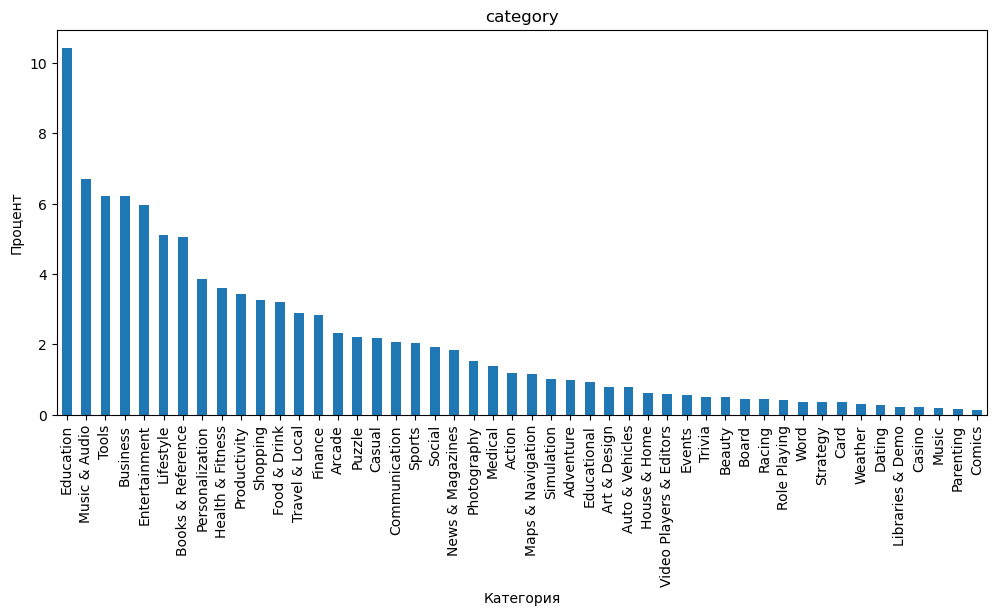

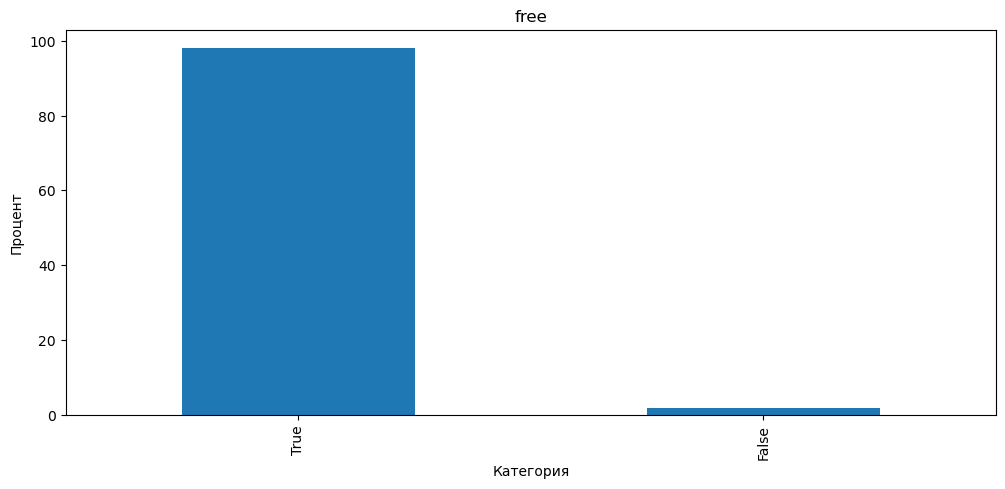

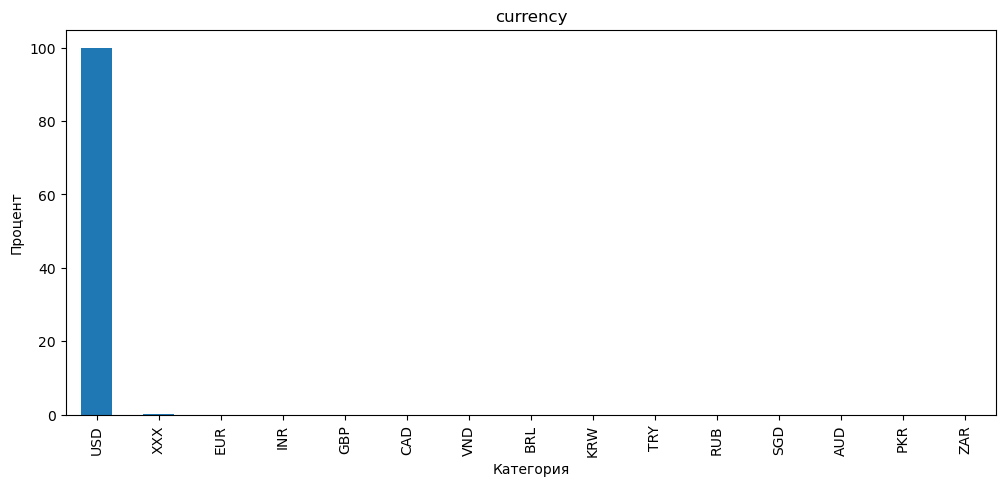

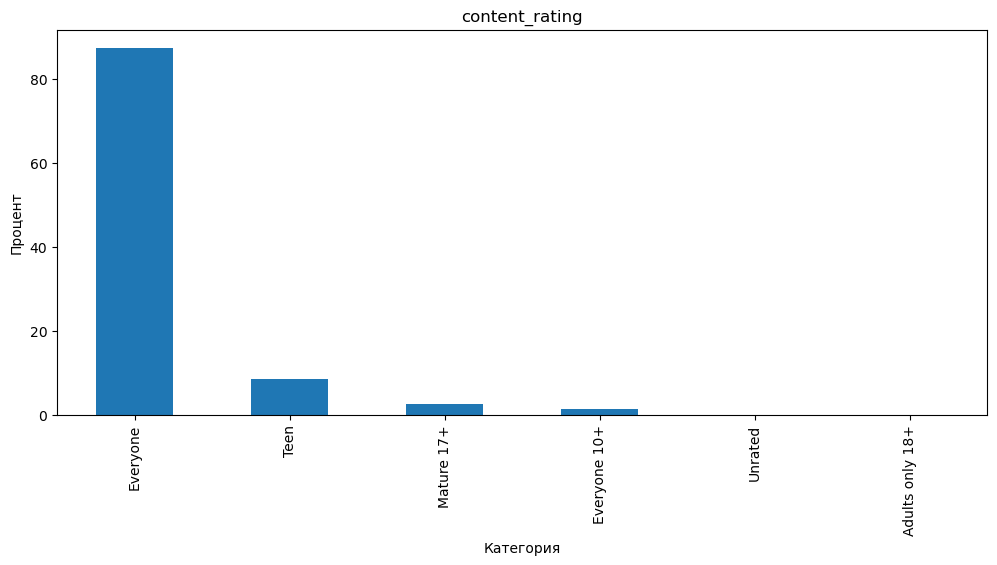

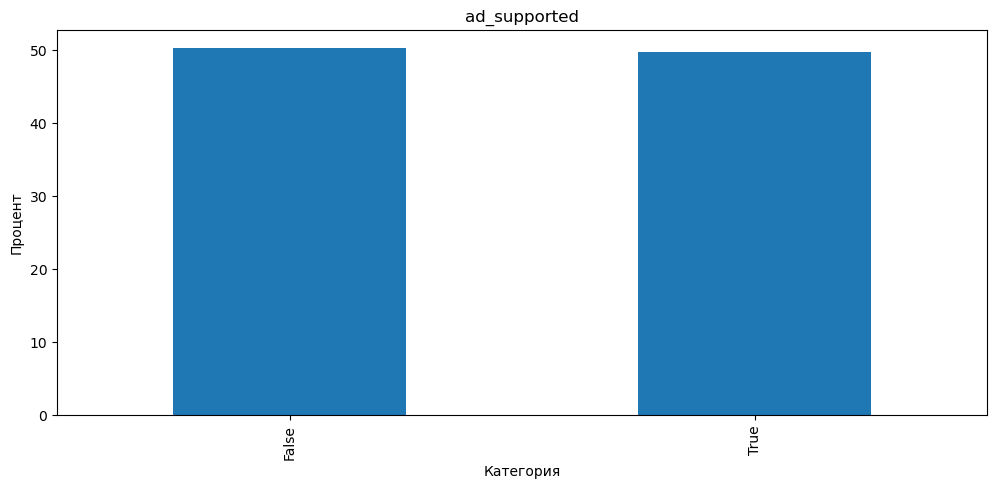

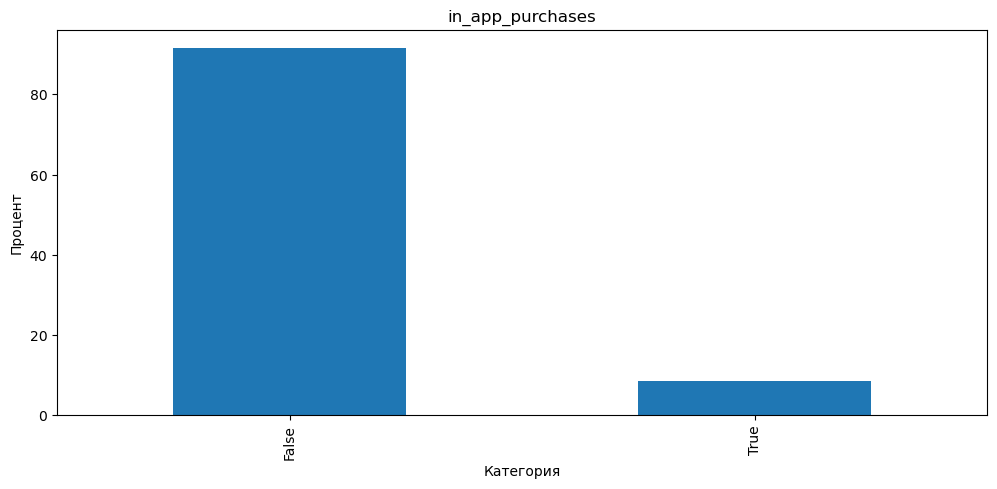

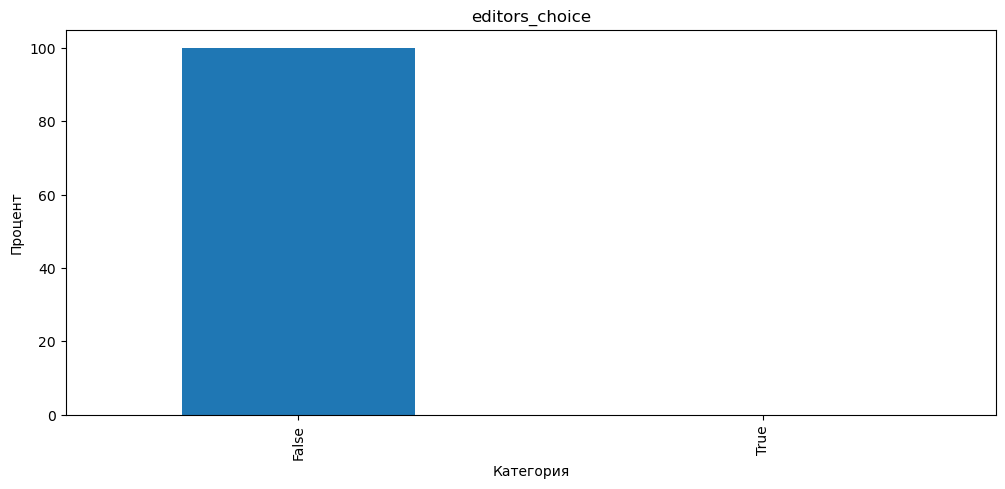

In [21]:
# Получаем список категориальных столбцов
cat_columns = data.drop(numeric_columns.union(datetime_columns), axis=1)

# Строим графики для каждой категории (столбца)
for col in cat_columns:
    # Вычисляем процентное соотношение каждой категории
    category_counts = data[col].value_counts(normalize=True) * 100
    
    # Сортируем категории по количеству (процентному соотношению)
    category_counts_sorted = category_counts.sort_values(ascending=False)
    
    # Строим график
    category_counts_sorted.plot(kind='bar', figsize=(12, 5))
    
    plt.title(col)
    plt.ylabel('Процент')
    plt.xlabel('Категория')
    plt.show()

# Кодирование категориальных значений

Будем применять OrdinalEncoder, чтобы не увеличивать пространство признаков\
Так же применяем метод fit_tranform потому, что нам не принципиальна утечка данных в инкодер,тк модели МО строиться НЕ будут

In [22]:
to_oe = data[['category', 'content_rating', 'currency']] # Определение столбуов для кодироваки
oe = OrdinalEncoder()
data_encoded = pd.DataFrame(oe.fit_transform(to_oe),
                            columns=['category', 'content_rating', 'currency']) # Сохранение резудьтата в датафрейм

In [23]:
# Конкатенация датафреймов, содержащих закодированные данные с числовыми и Булевыми
data_ready = pd.concat([data_encoded, data[numeric_columns]], axis=1)
data_ready =  pd.concat([data_ready, data.select_dtypes(include=bool)], axis=1)

# Выводим матрицу корреляции

Выведем матрицу корреляции признаков для наглядного отображения корреляции признаков.\
Так как в дата-сете присутствуют непрерывные (числовые) и категориальные признаки, будем использовать матрицу корреляции Phik

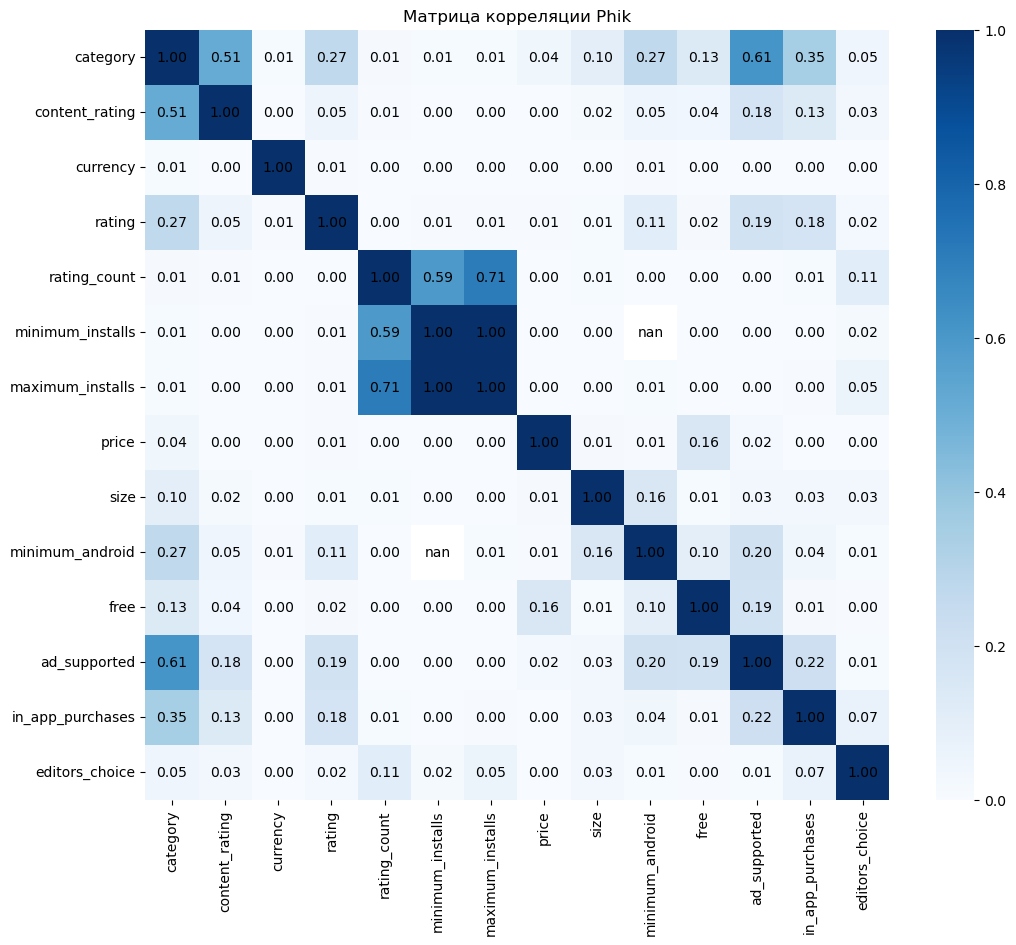

In [24]:
# Визуализируем матрицу
phik_matrix = data_ready.phik_matrix(interval_cols=numeric_columns) # Указываем числовые столбцы

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, cmap='Blues')

# Добавляем коэффициенты корреляции в саму матрицу
for i in range(phik_matrix.shape[0]):
    for j in range(phik_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(phik_matrix.iloc[i, j]),
                 ha='center', va='center', color='black', fontsize=10)

# Выводим матрицу корреляции
plt.title("Матрица корреляции Phik")
plt.show()

# Общий вывод о EDA

Датафрейм содержит информацию о приложениях из магазина Google Play store.\
Это довольно внушительных размеров дата-сет, состоящий из 2312944 строк и 24 столбцов.\
Однако, не все столбцы датафрейма одинаково полезны с точки зрения анализа данных. Неинформативными столбцами я счел 6 шт. Остальные 16 были мною проанализированы.\
В датафрейме наблюдается большое кол-во пропусков, до 32% данных потеряно в некоторых столбцах.\
К счастью, большое кол-во пропусков присутствует именно в тех столбцах, которые не несут особой смысловой нагрузки (сайт разработчиков, ссылки на политику конфиденциальности).\
В важных с точки зрения анализа столбцах, пропусков значительно меньше (около 3%), что является приеилимым.\
Дубликатов в дата-сете не было.

Выводы:
- Большинство приложений имеют рейтинг 0. Таковых в 5 раз больше, чем других рейтингов. Косвенно на это указывает разница между средним и медианым значением столбца (2864.8 против 6, соответственно). Это указывает на большое кол-во аномалий (выбросов) в столбце.
- Нередки случаи, когда приложения с нулевым рейтингом не имеют ни одной оценки. Это ставит под сомнение правомерность их определения как "низкорейтинговых", ведь их статус может резко измениться при появлении первых оценок
- Большинство приложений имеют небольшое кол-во установок (минимальное 500, максимальное 695 по медиане)
- Средняя цена приложения 0,1, медиана 0. Это говорит о сравнительно небольшой доле платных приложений
- Аналогичная ситуация и по весу приложения, медиана 9,7М, средняя 18,5М (после перевода всех весов в М)
- Львиная доля приложений работают на версии ОС выше 4.
- Кол-во приложений росло экспоненциально с 2014 года, но с 2020 наблюдаем некий спад
- Однако с 2019 года наблюдается резкий рост кол-ва обновлений приложений
- Это можно объяснить насыщением рынка новыми приложениями и необходимостью обновлять хорошо зарекомендовавшие себя приложения, вместо выпуска новых
- Резкий спад в конце графиков можно объяснить особенностями сбора данных
- Наиболее популярными категориями приложений являются: образовательные, стримирговые сервисы (музыка и аудиокниги), утилиты (инструменты), бизнес и развлекательные
- Наименее популярными категориями приложений являются: комиксы, семейные, казино и электронные библиотеки и демонстрации
- В связи с рейтингом наблюдаются несколько странностей: категория "музыка и аудио" находится в топе списка, а "музыка" в конце; Такая же ситуация с категориями "Образовательные" и "электронные библиотеки". Это странно и нуждается в дополнительном исследовании
- Подавляющее большинство приложений - бесплатны
- Основаная валюта - Доллар США
- Около 90% приложений имеют возрастное ограничение "everyone". Приложения с граничением 18+ отсутствуют
- Процент приложений, в которых присутствует реклама - 50%
- Около 95% приложений не имеют встроенных микроплатежей

Касаемо закономерностей:
- Наблюдается корреляция наличия реклами в приложении с категорией приложения
- Так же с категорией коррелирует и наличие микротранзакций в приложении
- Умеренная корреляция наблюдается у рейтинга и минимальной версией ОС с категорией
- Чем выше версия ОС, тем вероятнее наблюдать наличие рекламы и микротранзакций в приложении
- Сильная корреляция наблюдается в миниманом и максимальном кол-ве установок и количества оценок приложения, что вполне логично

# Task - 2

Техническое задание на разработку дашборда для руководства компании

Цель:

Создание дашборда для поддержки принятия решения о приоритетном направлении разработки мобильного приложения среди трех бизнес-направлений компании: образование, развлечения, аналитика для бизнеса.

Данные:

Финансовые показатели:
- Выручка по каждому направлению за последние 2 года (с разбивкой по кварталам)
- Доля рынка по каждому направлению
- Средний чек по каждому направлению
- Расходы на разработку и поддержку мобильного приложения по каждому направлению
- Показатели вовлеченности:
- Количество активных пользователей по каждому направлению
- Среднее время использования сервиса в день по каждому направлению
- Количество скачиваний/установок приложения по каждому направлению (если уже есть или у конкурентов)
- NPS (Net Promoter Score) по каждому направлению

Аналитика рынка:
- Тенденции развития рынка по каждому направлению
- Уровень конкуренции по каждому направлению
- Потенциальная емкость рынка по каждому направлению

Экспертная оценка:
Оценка потенциала каждого направления с точки зрения экспертов компании

Визуализация:

Дашборд должен содержать:
- Сводную таблицу с ключевыми показателями по каждому направлению
- Графики, иллюстрирующие динамику ключевых показателей по каждому направлению
- Карты с разбивкой показателей по регионам (если актуально)
- Визуализацию SWOT-анализа для каждого направления
- Возможность фильтрации данных по дате, региону, типу устройства и другим критериям

Функциональные требования:
- Обеспечивать возможность обновления данных в режиме реального времени
- Предоставлять возможность экспорта данных в различные форматы
- Поддерживать различные устройства (ПК, планшеты, смартфоны)
- Обеспечивать возможность совместной работы над дашбордом

Для разработки дашборда могут быть использованы:
- Power BI
- Tableau
- Google Data Studio
- Microsoft Excel


Сроки разработки:

Разработка дашборда должна быть выполнена в течение Х месяцев

Ожидаемый результат:

Дашборд должен предоставить руководству компании:
- Наглядную картину текущего состояния каждого бизнес-направления
- Понимание потенциала каждого направления
- Обоснование для принятия решения о приоритетном направлении разработки мобильного приложения

Дополнительно:

Дашборд должен быть:
- Расширяемым
- Доступным для всех пользователей, имеющих соответствующие права доступа
- Защищенным от несанкционированного доступа